In [1]:
"""
Purpose: To run the soma splitting 
on the processed neurons

"""


'\nPurpose: To run the soma splitting \non the processed neurons\n\n'

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")

import datajoint_utils as du
from importlib import reload

INFO - 2021-01-13 23:25:29,115 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:29,116 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:29,117 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:29,122 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-01-13 23:25:29,123 - settings - Setting enable_python_native_blobs to True
INFO - 2021-01-13 23:25:29,134 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-01-13 23:25:29,385 - settings - Setting enable_python_native_blobs to True


In [3]:
test_mode = True

In [4]:
import minfig
import time
import numpy as np
#want to add in a wait for the connection part
random_sleep_sec = np.random.randint(0, 200)
print(f"Sleeping {random_sleep_sec} sec before conneting")
if not test_mode:
    time.sleep(random_sleep_sec)
print("Done sleeping")

du.config_celii()
du.set_minnie65_config_segmentation(minfig)
du.print_minnie65_config_paths(minfig)

#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-01-13 23:25:29,449 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-01-13 23:25:29,450 - settings - Setting database.user to celiib
INFO - 2021-01-13 23:25:29,451 - settings - Setting database.password to newceliipass
INFO - 2021-01-13 23:25:29,454 - settings - Setting enable_python_native_blobs to True


Sleeping 81 sec before conneting
Done sleeping
Current path for external_segmentation_path = /mnt/dj-stor01/platinum/minnie65/02
Current path for external_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/meshes
Current path for external_decimated_mesh_path = /mnt/dj-stor01/platinum/minnie65/02/decimated_meshes
Current path for external_skeleton_path = /mnt/dj-stor01/platinum/minnie65/02/skeletons


INFO - 2021-01-13 23:25:29,717 - settings - Setting enable_python_native_blobs to True


# Defining the Table

In [5]:
import neuron_utils as nru
import neuron
import trimesh_utils as tu
import numpy as np

In [6]:
import meshlab
meshlab.set_meshlab_port(current_port=None)

No port chosen so picked random port 4796


In [7]:
#so that it will have the adapter defined
from datajoint_utils import *

In [8]:
key_source = minnie.Decomposition()
key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134947393276,0,0.25,29.00,0,0,1,=BLOB=,1400375,2824255,0,0,0,0,1,8,185,95,7813492.355591639,3676864.0708675147,27015.716,77.107,77.107,491.082,454.082,2129,0.0002724773895089825,11.508108108108107,3947980.024,70,0.0005392631135562199,30.414,217783493374.38446,59995177.73949442,27872.746713386125,55163.271356609184,3111192762.4912066,1455.6467
864691135012398582,0,0.25,29.00,0,0,1,=BLOB=,1376990,2794781,0,3,1,3,2,7,333,193,13856190.93238171,7698561.170643449,24656.795,186.318,177.736,526.688,490.357,5195,0.0003749226627542612,15.6006006006006,8675139.424,177,0.0005988376377707425,29.35,911951270671.0396,95420451.33998108,65815.43767124508,105122.37626384453,5152267065.938077,5458.7971
864691135012471798,0,0.25,29.00,0,0,1,=BLOB=,879119,1793791,0,2,2,2,2,9,283,83,10497114.543519672,2577718.474621564,21129.674,99.883,99.883,462.738,399.451,2705,0.0002576898621793086,9.558303886925795,6119605.255,122,0.00044202197483079325,22.172,343672497908.9721,73909008.13184547,32739.71113529824,56159.25923133291,2816987687.77846,2996.3999
864691135012571126,0,0.25,29.00,0,0,1,=BLOB=,1405952,2834699,0,5,5,0,1,9,438,190,15004093.215539565,5950216.270015861,22562.141,138.374,138.374,464.441,411.031,5392,0.0003593686017903147,12.310502283105023,8644420.327,215,0.0006237549536038427,25.079,973808719997.8567,107423240.84708405,64902.87057063164,112651.70863525233,4529342883.710961,4656.7696
864691135012905110,0,0.25,29.00,0,0,1,=BLOB=,816541,1676641,0,1,1,0,1,11,251,106,9668645.374834057,3910789.1103980723,24484.065,87.846,87.846,377.57,360.525,2129,0.0002201963064589635,8.48207171314741,5024192.766,95,0.0004237496647038483,22.411,387684463243.85925,100390791.9785207,40097.08167112429,77163.53279026621,4080889086.777466,1999.7675
864691135065018692,0,0.25,29.00,0,0,1,=BLOB=,927599,1896021,0,3,3,1,2,19,275,62,10132292.236507235,2065737.434988684,17292.299,110.528,11

In [9]:
import numpy as np
import time
import proofreading_utils as pru

@schema
class NeuronSplitSuggestions(dj.Computed):
    definition="""
    -> minnie.Decomposition
    ---
    split_results: longblob #will store the results of how to split the limbs of neuron objects
    run_time=NULL : double                   # the amount of time to run (seconds)

    """

    key_source = minnie.Decomposition()
    
    def make(self,key):
        """
        Pseudocode for process:

        1) Fetch the neuron object
        2) Run the mutli-split suggestions
        3) Calculate the total time
        4) Write the results to the table
        """
        whole_pass_time = time.time()
        #1) Get the segment id from the key
        segment_id = key["segment_id"]
        print(f"\n\n----- Working on Neuron {segment_id}-------")
        
        neuron_obj = (minnie.Decomposition & key).fetch1("decomposition")
        
        limb_results = pru.multi_soma_split_suggestions(neuron_obj,plot_intermediates=False)
        
        #7) Pass stats and file location to insert
        new_key = dict(key,
                       split_results = limb_results,
                       run_time=np.round(time.time() - whole_pass_time,4)
                      )

        self.insert1(new_key, allow_direct_insert=True, skip_duplicates=True)

        print(f"\n\n ------ Total time for Splitting {segment_id} = {time.time() - whole_pass_time} ------")
    

# Running the Populate

In [10]:
curr_table = (minnie.schema.jobs & "table_name='__neuron_split_suggestions'")
(curr_table)#.delete()# & "status='error'")
#curr_table.delete()
#(curr_table & "error_message = 'ValueError: need at least one array to concatenate'").delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__neuron_split_suggestions,008c4d22e8e4c9b8eea4676f09706640,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:54:12
__neuron_split_suggestions,0cec0240576876905afc52bc010719e8,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:14:06
__neuron_split_suggestions,0e5cd6eab1b5f2e550cf30b458e990cf,error,=BLOB=,Exception: base_node (101) and upstream_node (136) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10479,36037,2021-01-13 16:57:56
__neuron_split_suggestions,13123179026cc7faebd655f15ef45844,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10542,36039,2021-01-13 16:59:28
__neuron_split_suggestions,29ef90c9bf67783e41258c6e923a177d,error,=BLOB=,Exception: base_node (68) and upstream_node (81) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10353,36034,2021-01-13 16:19:57
__neuron_split_suggestions,4b8616de1575f9dcfef86e69b2cdd0bc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10416,36035,2021-01-13 16:30:20
__neuron_split_suggestions,4dd62a4a7f6e893aafc470b844f03f12,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 17:05:09
__neuron_split_suggestions,8e765a57fcf0e32ace865a137199826e,error,=BLOB=,Exception: base_node (34) and upstream_node (28) are not connected in the concept network,=BLOB=,celiib@10.21.18.111,71caefafdeec,10257,36033,2021-01-13 16:32:42
__neuron_split_suggestions,962778371ff53114b0f9fac08fb862dc,error,=BLOB=,IndexError: list index out of range,=BLOB=,celiib@10.21.18.111,71caefafdeec,10185,36032,2021-01-13 16:29:14
__neuron_split_suggestions,994bf9403e5bc2fb25a3666b4a6446f5,reserved,=BLOB=,,=BLOB=,celiib@10.21.18.111,71caefafdeec,23926,36202,2021-01-13 17:25:24


INFO - 2021-01-13 23:25:29,857 - autopopulate - Found 121 keys to populate
INFO - 2021-01-13 23:25:29,875 - connection - Transaction started
INFO - 2021-01-13 23:25:29,877 - autopopulate - Populating: {'segment_id': 864691135012905110, 'decimation_version': 0, 'decimation_ratio': Decimal('0.25'), 'ver': Decimal('29.00'), 'process_version': 0, 'index': 0}


Populate Started


----- Working on Neuron 864691135012905110-------
Decompressing Neuron in minimal output mode...please wait
multi_soma_limbs = []
multi_touch_limbs = [0]


 -------- Working on limb 0------------
Starting combinations to process = [[47 55]
 [47 61]
 [55 61]]


---- working on disconnecting 47 and 55
---- This disconnects S0_1 from S0_0  
 Cut iteration 0
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 1
Total number of graphs at the end of the split AFTER DIRECTIONAL = 1
Shortest path = [47, 46, 43, 42, 41, 50, 49, 53, 56, 57, 55]

 --------- START OF GET BEST EDGE --------- 
curr_limb.deleted_edges=[]
consider_path_neighbors_for_removal is set so segments_to_consider = [34 38 39 40 41 42 43 46 48 49 50 51 52 53 56 57 59 67]
Short segments to combine = [42 56 59]


-------- Removing Segments -------------
curr_short_seg_revised = 42
np.sum(touch_len>0) = 2
Using average stitch point
touching_endpoints = [[711146.456506   792118.46606897 667075.385

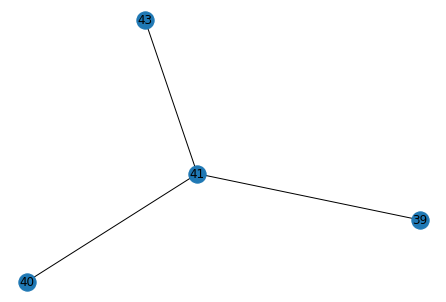

match_branches = [[39, 43]]
edges_to_delete (resolve crossover) = [[39, 40], [39, 41], [40, 41], [40, 43], [41, 43]]
edges_to_create (resolve crossover) = [[39, 43]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[39, 40], [39, 41], [40, 41], [40, 43], [41, 43]]
edges_to_create = [[39, 43]]
Number of connected components = 6
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 37, 38, 41, 44, 45, 49, 50, 51, 52, 53, 54, 55, 57, 58, 61, 63, 64, 65, 67, 69, 70, 73, 77, 81, 82, 83, 88, 89, 90, 91, 92, 94, 95, 97, 98, 103, 104, 105}
Comp 1 = {8, 32, 33, 34, 35, 36, 39, 43, 46, 47, 48, 60, 62, 66, 68, 71, 72, 74, 75, 76, 78, 79, 80, 84, 85, 86, 87, 93, 96, 99, 100, 101, 102}
Comp 2 = {40}
Comp 3 = {42}
Comp 4 = {56}
Comp 5 = {59}
curr_limb_copy.deleted_edges = [[39, 40], [39, 41], [40, 41], [40, 43], [41, 43]]
curr_limb_copy.created_edges = [[39, 43]]
After get best cut: cut_edges = 

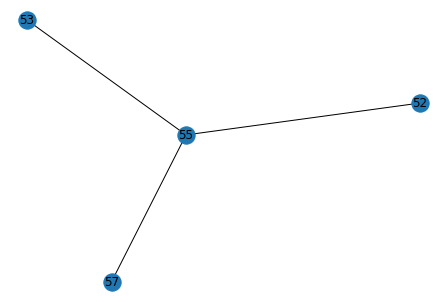

match_branches = [[52, 55]]
edges_to_delete (resolve crossover) = [[52, 53], [52, 57], [53, 55], [53, 57], [55, 57]]
edges_to_create (resolve crossover) = [[52, 55]]
curr_limb.deleted_edges 5 =[[39, 40], [39, 41], [40, 41], [40, 43], [41, 43]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[52, 53], [52, 57], [53, 55], [53, 57], [55, 57]]
edges_to_create = [[52, 55]]
Number of connected components = 8
Comp 0 = {52, 55}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 37, 38, 41, 44, 45, 49, 50, 51, 53, 54, 63, 65, 67, 69, 70, 73, 77, 81, 82, 83, 90, 91, 92, 94, 95, 97, 98, 103, 104, 105}
Comp 2 = {64, 89, 88, 57, 58, 61}
Comp 3 = {8, 32, 33, 34, 35, 36, 39, 43, 46, 47, 48, 60, 62, 66, 68, 71, 72, 74, 75, 76, 78, 79, 80, 84, 85, 86, 87, 93, 96, 99, 100, 101, 102}
Comp 4 = {40}
Comp 5 = {42}
Comp 6 = {56}
Comp 7 = {59}
curr_limb_copy.deleted_edges = [[39, 40], [39, 41], [40, 41], [40, 43], [41, 43], [52, 5

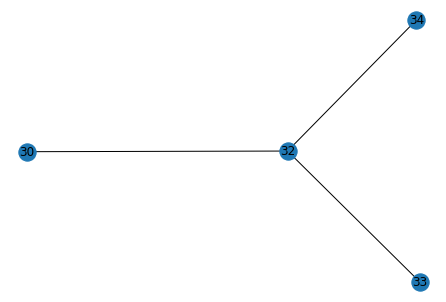

match_branches = [[30, 34]]
edges_to_delete (resolve crossover) = [[30, 32], [30, 33], [32, 33], [32, 34], [33, 34]]
edges_to_create (resolve crossover) = [[30, 34]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 31 because skeletal distance was 1859.7393222605256 and threshold was 2500
skip_nodes = [31]
edges_to_delete (cut_limb_network) = [[30, 32], [30, 33], [32, 33], [32, 34], [33, 34]]
edges_to_create = [[30, 34]]
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 32, 35, 36}
Comp 1 = {0, 34, 7, 8, 30, 31}
Comp 2 = {33}
curr_limb_copy.deleted_edges = [[30, 32], [30, 33], [32, 33], [32, 34], [33, 34]]
curr_limb_copy.created_edges = [[30, 34]]
After get best cut: cut_edges = [[30, 32], [30, 33], [32, 33], [32, 34], [33, 34]], added_edges = [[30, 34]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECT

  Edge: [0 5]: curr_angle = 58.78
  Edge: [5 3]: curr_angle = 116.07
  Edge: [3 1]: curr_angle = 85.72

Total time for doubling_back = 0.19840073585510254
There were 1 edges that passed doubling back threshold of 100
Winning edge [5 3] had a doubling back of 116.07461725002302
***inside resolve crossover!!!!****
coordinate_branches = [2, 3, 5]
2 = red
3 = aqua
5 = purple
Angle between 2 and 3 = 41.05 
Angle between 2 and 5 = 134.87 
Angle between 3 and 5 = 84.61 
Final Matches = []
matched_branches_revised = []
Original graph


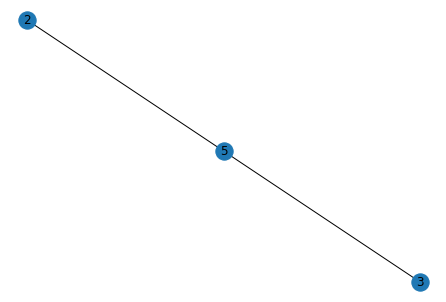

match_branches = []
edges_to_delete (resolve crossover) = [[2, 3], [2, 5], [3, 5]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([2, 3]), array([2, 5]), array([3, 5])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 3, 4}
Comp 1 = {2}
Comp 2 = {0, 5, 6}
curr_limb_copy.deleted_edges = [array([2, 3]), array([2, 5]), array([3, 5])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([2, 3]), array([2, 5]), array([3, 5])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 3: [array([1, 3, 4]), array([2]), array([0, 5, 6])]


 ------ Total time for Splitting 864691135775809197 = 115.68562197685242 ------


----- Working on Neuron 8

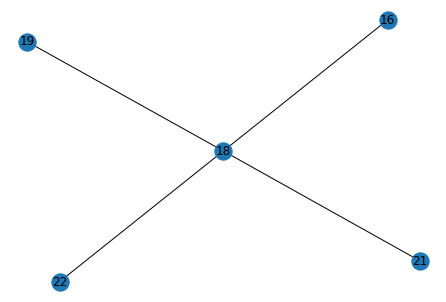

match_branches = [[18, 19], [16, 21]]
edges_to_delete (resolve crossover) = [[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create (resolve crossover) = [[18, 19], [16, 21]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create = [[18, 19], [16, 21]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 23, 27, 28, 30, 31, 33, 34, 36, 37, 40, 42, 44, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 78, 79, 82, 83, 84, 87, 90, 91, 96, 97, 101, 102.0, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 140, 141, 147, 149, 158, 159, 160, 161, 162, 163, 164, 165, 174}
Comp 1 = {133, 134, 135, 136, 137, 138, 139, 142, 143, 16, 144, 146, 145, 148, 21, 150, 151, 152, 25, 154, 155, 26,

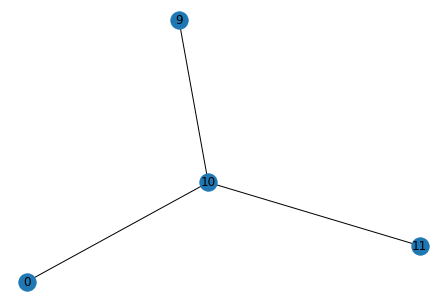

match_branches = [[0, 11], [9, 10]]
edges_to_delete (resolve crossover) = [[0, 9], [0, 10], [9, 11], [10, 11]]
edges_to_create (resolve crossover) = [[0, 11], [9, 10]]
curr_limb.deleted_edges 5 =[[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[0, 9], [0, 10], [9, 11], [10, 11]]
edges_to_create = [[0, 11], [9, 10]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 23, 27, 28, 30, 31, 33, 34, 36, 37, 40, 42, 44, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 78, 79, 82, 83, 84, 87, 90, 91, 96, 97, 101, 102.0, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 140, 141, 147, 149, 158, 159, 160, 161, 162, 163, 164, 165, 174}
Comp 1 = {133, 134, 135, 136, 137, 138, 139, 142, 143, 16, 144, 146, 145, 148, 21, 150, 151, 152, 25, 154, 155, 26, 29, 157, 153, 3

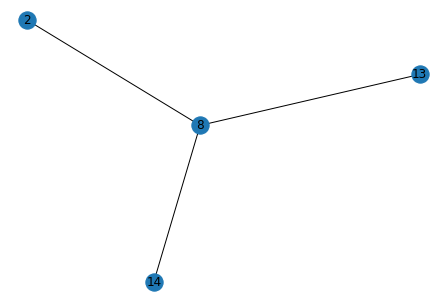

match_branches = [[2, 14]]
edges_to_delete (resolve crossover) = [[2, 8], [2, 13], [8, 13], [8, 14], [13, 14]]
edges_to_create (resolve crossover) = [[2, 14]]
curr_limb.deleted_edges 5 =[[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22], [0, 9], [0, 10], [9, 11], [10, 11]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 8], [2, 13], [8, 13], [8, 14], [13, 14]]
edges_to_create = [[2, 14]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 23, 27, 28, 30, 31, 33, 34, 36, 37, 40, 42, 44, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 78, 79, 82, 83, 84, 87, 90, 91, 96, 97, 101, 102.0, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 140, 141, 147, 149, 158, 159, 160, 161, 162, 163, 164, 165, 174}
Comp 1 = {13}
Comp 2 = {133, 134, 135, 136, 137, 138, 139, 142, 143, 16, 144, 146, 145, 148, 21, 150, 151, 1

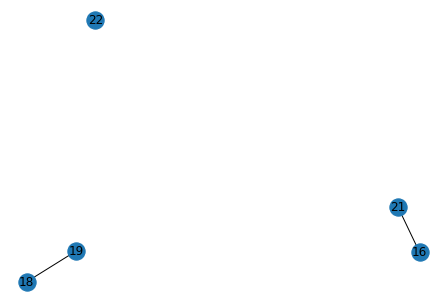

match_branches = [[18, 19], [16, 21]]
edges_to_delete (resolve crossover) = [[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create (resolve crossover) = [[18, 19], [16, 21]]
curr_limb.deleted_edges 5 =[[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22], [0, 9], [0, 10], [9, 11], [10, 11], [2, 8], [2, 13], [8, 13], [8, 14], [13, 14]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22]]
edges_to_create = [[18, 19], [16, 21]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19, 20, 23, 27, 28, 30, 31, 33, 34, 36, 37, 40, 42, 44, 46, 47, 57, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 71, 78, 79, 82, 83, 84, 87, 90, 91, 96, 97, 101, 102.0, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 140, 141, 147, 149, 158, 

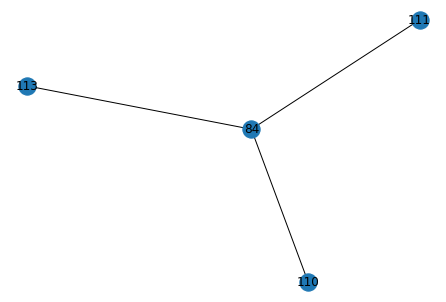

match_branches = [[110, 113]]
edges_to_delete (resolve crossover) = [[84, 110], [84, 111], [84, 113], [110, 111], [111, 113]]
edges_to_create (resolve crossover) = [[110, 113]]
curr_limb.deleted_edges 5 =[[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22], [0, 9], [0, 10], [9, 11], [10, 11], [2, 8], [2, 13], [8, 13], [8, 14], [13, 14], [16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[84, 110], [84, 111], [84, 113], [110, 111], [111, 113]]
edges_to_create = [[110, 113]]
Number of connected components = 6
Comp 0 = {129, 1, 3, 4, 5, 6, 7, 8, 9, 10, 140, 141, 12, 17, 18, 147, 20, 149, 19, 23, 27, 28, 158, 159, 160, 161, 162, 163, 164, 165, 33, 34, 40, 42, 44, 46, 174, 57, 58, 61, 62, 63, 64, 65, 69, 71, 79, 82, 83, 87, 90, 91, 96, 97, 101, 102.0, 104, 105, 106, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126}
Comp 1 = {0, 2, 68, 37, 36, 11, 14, 15, 78,

  Edge: [17 18]: curr_angle = 22.83
  Edge: [18 19]: curr_angle = 4.63
  Edge: [19 20]: curr_angle = 33.21
  Edge: [20 23]: curr_angle = 22.17
  Edge: [23 27]: curr_angle = 20.87
  Edge: [27 40]: curr_angle = 38.7
  Edge: [40 57]: curr_angle = 170.11
  Edge: [57 65]: curr_angle = 29.4
  Edge: [ 65 122]: curr_angle = 28.19
  Edge: [122 125]: curr_angle = 34.59
  Edge: [125 118]: curr_angle = 20.57
  Edge: [118 113]: curr_angle = 16.11
  Edge: [113 110]: curr_angle = 11.38

Total time for doubling_back = 1.007659912109375
There were 1 edges that passed doubling back threshold of 100
Winning edge [40 57] had a doubling back of 170.10832297482781
***inside resolve crossover!!!!****
coordinate_branches = [40, 57, 62]
40 = red
57 = aqua
62 = purple
Angle between 40 and 57 = 157.14 
Angle between 40 and 62 = 30.18 
Angle between 57 and 62 = 22.92 
Final Matches = [[40, 62], [57, 62]]
matched_branches_revised = [[57, 62]]
Original graph


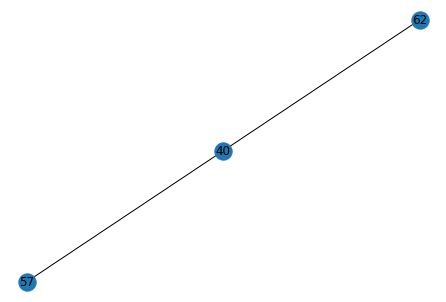

match_branches = [[57, 62]]
edges_to_delete (resolve crossover) = [[40, 57], [40, 62]]
edges_to_create (resolve crossover) = [[57, 62]]
edges_to_delete (cut_limb_network) = [array([40, 57]), array([40, 62])]
edges_to_create = [[57, 62]]
Number of connected components = 7
Comp 0 = {129, 140, 141, 147, 149, 158, 159, 160, 161, 162, 163, 164, 165, 33, 34, 44, 46, 174, 57, 58, 61, 62, 63, 64, 65, 69, 71, 79, 82, 83, 87, 90, 91, 96, 106, 108, 109, 110, 112, 113, 114, 115, 116, 118, 119, 122, 123, 124, 125, 126}
Comp 1 = {0, 2, 68, 37, 36, 11, 14, 15, 78, 47, 84, 59, 60, 30, 31}
Comp 2 = {128, 130, 131, 132, 103, 111, 127}
Comp 3 = {1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 17, 18, 19, 20, 23, 27, 28, 40, 42, 97, 101, 102.0, 104, 105}
Comp 4 = {13}
Comp 5 = {133, 134, 135, 136, 137, 138, 139, 142, 143, 16, 144, 146, 145, 148, 21, 150, 151, 152, 25, 154, 155, 26, 29, 157, 153, 32, 156, 35, 166, 39, 167, 41, 168, 43, 169, 45, 173, 171, 48, 49, 50, 51, 52, 53, 54, 55, 56, 176, 38, 66, 67, 70, 72, 73, 74,

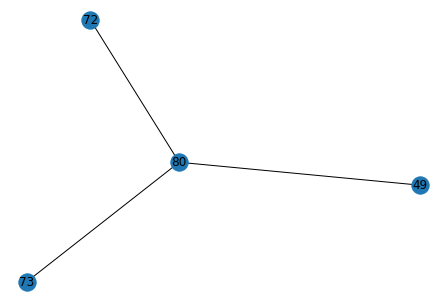

match_branches = [[49, 80]]
edges_to_delete (resolve crossover) = [[49, 72], [49, 73], [72, 73], [72, 80], [73, 80]]
edges_to_create (resolve crossover) = [[49, 80]]
curr_limb.deleted_edges 5 =[[16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22], [0, 9], [0, 10], [9, 11], [10, 11], [2, 8], [2, 13], [8, 13], [8, 14], [13, 14], [16, 18], [16, 19], [16, 22], [18, 21], [18, 22], [19, 21], [19, 22], [21, 22], [84, 110], [84, 111], [84, 113], [110, 111], [111, 113], array([40, 57]), array([40, 62])]
Skipping endnode 152 because skeletal distance was 1231.8871209716483 and threshold was 2500
skip_nodes = [152]
edges_to_delete (cut_limb_network) = [[49, 72], [49, 73], [72, 73], [72, 80], [73, 80]]
edges_to_create = [[49, 80]]
Number of connected components = 10
Comp 0 = {129, 140, 141, 147, 149, 158, 159, 160, 161, 162, 163, 164, 165, 33, 34, 44, 46, 174, 57, 58, 61, 62, 63, 64, 65, 69, 71, 79, 82, 83, 87, 90, 91, 96, 106, 108, 109, 110, 112, 113, 114, 115, 116, 118,

  Edge: [0 3]: curr_angle = 16.21
  Edge: [3 6]: curr_angle = 13.3
  Edge: [6 8]: curr_angle = 39.48
  Edge: [ 8 14]: curr_angle = 52.55
  Edge: [14 13]: curr_angle = 106.91
  Edge: [13 11]: curr_angle = 6.12
  Edge: [11 10]: curr_angle = 31.51

Total time for doubling_back = 0.6144721508026123
There were 1 edges that passed doubling back threshold of 100
Winning edge [14 13] had a doubling back of 106.91115816593933
***inside resolve crossover!!!!****
coordinate_branches = [13, 14, 16]
13 = red
14 = aqua
16 = purple
Angle between 13 and 14 = 108.22 
Angle between 13 and 16 = 23.02 
Angle between 14 and 16 = 61.66 
Final Matches = [[13, 16]]
matched_branches_revised = [[13, 16]]
Original graph


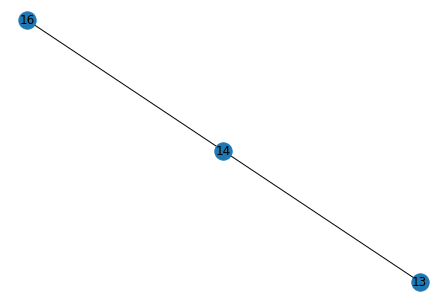

match_branches = [[13, 16]]
edges_to_delete (resolve crossover) = [[13, 14], [14, 16]]
edges_to_create (resolve crossover) = [[13, 16]]
edges_to_delete (cut_limb_network) = [array([13, 14]), array([14, 16])]
edges_to_create = [[13, 16]]
Number of connected components = 2
Comp 0 = {0, 2, 3, 5, 6, 7, 8, 14, 15}
Comp 1 = {1, 4, 9, 10, 11, 12, 13, 16}
curr_limb_copy.deleted_edges = [array([13, 14]), array([14, 16])]
curr_limb_copy.created_edges = [[13, 16]]
After get best cut: cut_edges = [array([13, 14]), array([14, 16])], added_edges = [[13, 16]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  2,  3,  5,  6,  7,  8, 14, 15]), array([ 1,  4,  9, 10, 11, 12, 13, 16])]


 ------ Total time for Splitting 864691

  Edge: [1 5]: curr_angle = 15.45
  Edge: [5 6]: curr_angle = 57.66

Total time for doubling_back = 0.8303747177124023

Attempting the width jump check (attempting from both sides)
  Edge: [1 5]: jump = 111.53
  Edge: [5 6]: jump = 255.45
Adding error edge [5 6] because width jump was 255.44700994455536
Total time for width = 0.8507013320922852
Path starting at 2 had err_edges: [[5, 6]]
  Edge: [6 5]: jump = -244.16
  Edge: [5 1]: jump = -111.53
Total time for width = 0.8943049907684326
Path starting at 6 had err_edges: []
first_error_sizes = [255.44700994455536, -inf], winning_path = 0
***inside resolve crossover!!!!****
coordinate_branches = [3, 5, 6]
3 = red
5 = aqua
6 = purple
Angle between 3 and 5 = 107.32 
Angle between 3 and 6 = 20.52 
Angle between 5 and 6 = 52.74 
Final Matches = [[3, 6]]
matched_branches_revised = [[3, 6]]
Original graph


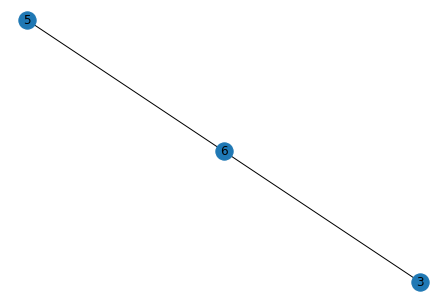

match_branches = [[3, 6]]
edges_to_delete (resolve crossover) = [[3, 5], [5, 6]]
edges_to_create (resolve crossover) = [[3, 6]]
edges_to_delete (cut_limb_network) = [array([3, 5]), array([5, 6])]
edges_to_create = [[3, 6]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5}
Comp 1 = {3, 6}
curr_limb_copy.deleted_edges = [array([3, 5]), array([5, 6])]
curr_limb_copy.created_edges = [[3, 6]]
After get best cut: cut_edges = [array([3, 5]), array([5, 6])], added_edges = [[3, 6]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([0, 1, 2, 4, 5]), array([3, 6])]


 ------ Total time for Splitting 864691136041004886 = 102.31442999839783 ------


----- Working on Neuron 864691135740250731-------
Decompressing Neu

  Edge: [16 14]: curr_angle = 44.45
  Edge: [14 13]: curr_angle = 29.82
  Edge: [13 19]: curr_angle = 18.29
  Edge: [19 21]: curr_angle = 23.21
  Edge: [21 22]: curr_angle = 42.04
  Edge: [22 25]: curr_angle = 29.69
  Edge: [25 24]: curr_angle = 34.14

Total time for doubling_back = 0.6298983097076416

Attempting the width jump check (attempting from both sides)
  Edge: [16 14]: jump = -159.27
  Edge: [14 13]: jump = 220.79
Adding error edge [14 13] because width jump was 220.79010268244994
  Edge: [13 19]: jump = -52.09
  Edge: [19 21]: jump = 168.35
  Edge: [21 22]: jump = 48.76
  Edge: [22 25]: jump = 90.8
  Edge: [25 24]: jump = 164.94
Total time for width = 1.1502211093902588
Path starting at 16 had err_edges: [[14, 13]]
  Edge: [24 25]: jump = -164.94
  Edge: [25 22]: jump = -90.8
  Edge: [22 21]: jump = -48.76
  Edge: [21 19]: jump = -168.35
  Edge: [19 13]: jump = 52.09
  Edge: [13 14]: jump = -220.79
  Edge: [14 16]: jump = 159.27
Total time for width = 0.7787578105926514
Path

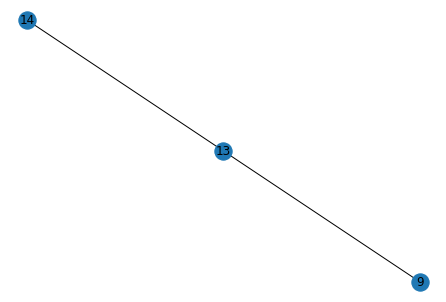

match_branches = [[9, 13]]
edges_to_delete (resolve crossover) = [[9, 14], [13, 14]]
edges_to_create (resolve crossover) = [[9, 13]]
edges_to_delete (cut_limb_network) = [array([ 9, 14]), array([13, 14])]
edges_to_create = [[9, 13]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36}
Comp 1 = {3, 12, 14, 15, 16}
curr_limb_copy.deleted_edges = [array([ 9, 14]), array([13, 14])]
curr_limb_copy.created_edges = [[9, 13]]
After get best cut: cut_edges = [array([ 9, 14]), array([13, 14])], added_edges = [[9, 13]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 13

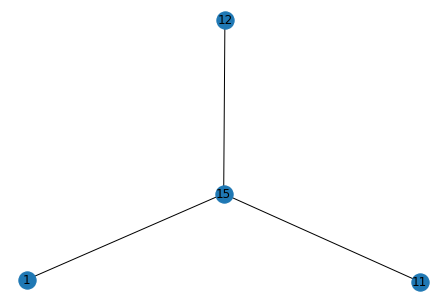

match_branches = [[12, 15]]
edges_to_delete (resolve crossover) = [[1, 11], [1, 12], [1, 15], [11, 12], [11, 15]]
edges_to_create (resolve crossover) = [[12, 15]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 11], [1, 12], [1, 15], [11, 12], [11, 15]]
edges_to_create = [[12, 15]]
Number of connected components = 6
Comp 0 = {0, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 21, 22, 29, 30, 31}
Comp 1 = {1}
Comp 2 = {2, 11, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138}
Comp 3 = {14}
Comp 4 = {47}
Comp 5 = {5

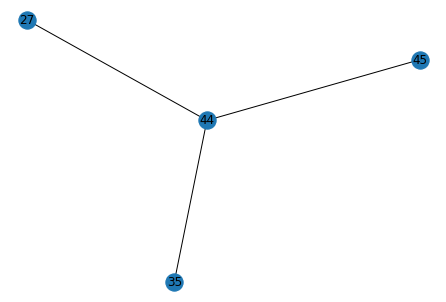

match_branches = [[27, 44], [35, 45]]
edges_to_delete (resolve crossover) = [[27, 35], [27, 45], [35, 44], [44, 45]]
edges_to_create (resolve crossover) = [[27, 44], [35, 45]]
curr_limb.deleted_edges 5 =[[1, 11], [1, 12], [1, 15], [11, 12], [11, 15]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[27, 35], [27, 45], [35, 44], [44, 45]]
edges_to_create = [[27, 44], [35, 45]]
Number of connected components = 8
Comp 0 = {0, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 21, 22, 29, 30, 31}
Comp 1 = {1}
Comp 2 = {2, 11, 16, 18, 19, 20, 23, 24, 25, 26, 27, 28, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 56, 57, 58, 60, 61, 62, 64, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 95, 96, 98, 99}
Comp 3 = {128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 35, 37, 45, 59, 63, 68, 72, 78, 91, 92, 93, 94, 97, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 12

  Edge: [6 7]: curr_angle = 151.05
  Edge: [7 9]: curr_angle = 23.5
  Edge: [ 9 10]: curr_angle = 29.22
  Edge: [10  3]: curr_angle = 118.34
  Edge: [3 2]: curr_angle = 96.2
  Edge: [2 8]: curr_angle = 154.94

Total time for doubling_back = 0.3734474182128906
There were 3 edges that passed doubling back threshold of 100
Winning edge [2 8] had a doubling back of 154.935714210408
***inside resolve crossover!!!!****
coordinate_branches = [0, 2, 8]
0 = red
2 = aqua
8 = purple
Angle between 0 and 2 = 92.6 
Angle between 0 and 8 = 43.32 
Angle between 2 and 8 = 58.18 
Final Matches = []
matched_branches_revised = []
Original graph


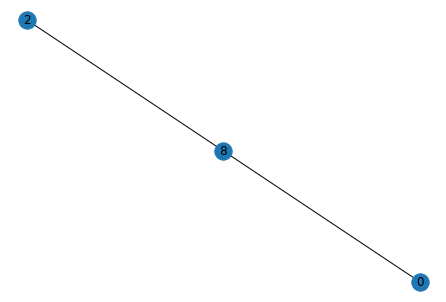

match_branches = []
edges_to_delete (resolve crossover) = [[0, 2], [0, 8], [2, 8]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([0, 2]), array([0, 8]), array([2, 8])]
edges_to_create = []
Number of connected components = 3
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {0}
Comp 2 = {8}
curr_limb_copy.deleted_edges = [array([0, 2]), array([0, 8]), array([2, 8])]
curr_limb_copy.created_edges = []
After get best cut: cut_edges = [array([0, 2]), array([0, 8]), array([2, 8])], added_edges = []
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 3
Total number of graphs at the end of the split AFTER DIRECTIONAL = 3
No valid path so moving onto the next connection


---- working on disconnecting 6 and 18
---- This disconnects S1_1 from S0_0  
 Cut iteration 0
Tota

  Edge: [6 7]: curr_angle = 39.08
  Edge: [7 9]: curr_angle = 23.5
  Edge: [ 9 10]: curr_angle = 29.22
  Edge: [10  3]: curr_angle = 118.34
  Edge: [ 3 12]: curr_angle = 20.46
  Edge: [12 19]: curr_angle = 37.02
  Edge: [19 17]: curr_angle = 20.6
  Edge: [17 18]: curr_angle = 15.93

Total time for doubling_back = 0.6052706241607666
There were 1 edges that passed doubling back threshold of 100
Winning edge [10  3] had a doubling back of 118.33963959435485
***inside resolve crossover!!!!****
coordinate_branches = [3, 10, 12]
3 = red
10 = aqua
12 = purple
Angle between 3 and 10 = 124.87 
Angle between 3 and 12 = 28.11 
Angle between 10 and 12 = 83.11 
Final Matches = [[3, 12]]
matched_branches_revised = [[3, 12]]
Original graph


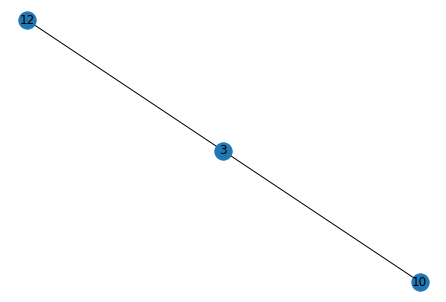

match_branches = [[3, 12]]
edges_to_delete (resolve crossover) = [[3, 10], [10, 12]]
edges_to_create (resolve crossover) = [[3, 12]]
edges_to_delete (cut_limb_network) = [array([ 3, 10]), array([10, 12])]
edges_to_create = [[3, 12]]
Number of connected components = 4
Comp 0 = {1, 2, 3, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}
Comp 1 = {4, 5, 6, 7, 9, 10, 11, 13, 14}
Comp 2 = {0}
Comp 3 = {8}
curr_limb_copy.deleted_edges = [array([0, 2]), array([0, 8]), array([2, 8]), array([ 3, 10]), array([10, 12])]
curr_limb_copy.created_edges = [[3, 12]]
After get best cut: cut_edges = [array([ 3, 10]), array([10, 12])], added_edges = [[3, 12]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total number of graphs at the end of the split AFTER DIRECTIONAL = 4
No valid path so moving onto the next connection


---- working on disconnecting 8 and 18
---- Thi

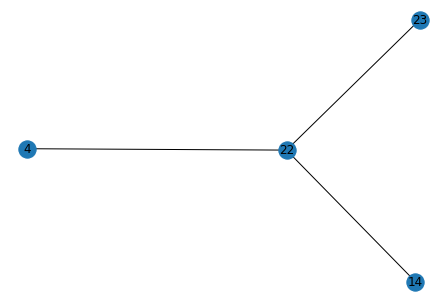

match_branches = [[22, 23]]
edges_to_delete (resolve crossover) = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23]]
edges_to_create (resolve crossover) = [[22, 23]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23]]
edges_to_create = [[22, 23]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77.0, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 1 = {4}
Comp 2 = {14}
curr_limb_copy.deleted_edges = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23]]
curr_limb_copy.created_edges = [[22, 23]]
After get best cut: cut_edges = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23]], added_edges = [[22, 23]]
total_som

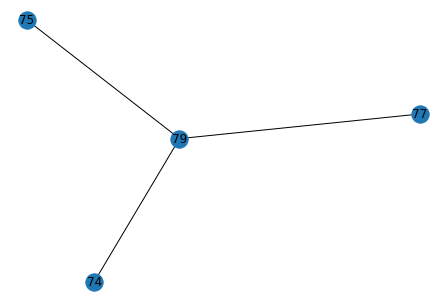

match_branches = [[74, 75], [77, 79]]
edges_to_delete (resolve crossover) = [[74, 77], [74, 79], [75, 77], [75, 79]]
edges_to_create (resolve crossover) = [[74, 75], [77, 79]]
curr_limb.deleted_edges 5 =[[4, 14], [4, 22], [4, 23], [14, 22], [14, 23]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[74, 77], [74, 79], [75, 77], [75, 79]]
edges_to_create = [[74, 75], [77, 79]]
Number of connected components = 3
Comp 0 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77.0, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95}
Comp 1 = {4}
Comp 2 = {14}
curr_limb_copy.deleted_edges = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23], [74, 77], [74, 79], [75, 77], [75, 79]]
curr_limb_copy.created_edges = [[22, 23], [74, 75], [77,

  Edge: [20. 21.]: curr_angle = 14.37
  Edge: [21. 22.]: curr_angle = 24.52
  Edge: [22. 23.]: curr_angle = 31.4
  Edge: [23. 24.]: curr_angle = 11.65
  Edge: [24. 27.]: curr_angle = 8.68
  Edge: [27. 31.]: curr_angle = 13.67
  Edge: [31. 33.]: curr_angle = 25.26
  Edge: [33. 36.]: curr_angle = 27.81
  Edge: [36. 44.]: curr_angle = 36.94
  Edge: [44. 94.]: curr_angle = 108.83
  Edge: [94. 90.]: curr_angle = 57.05
  Edge: [90. 79.]: curr_angle = 29.19
  Edge: [79. 77.]: curr_angle = 18.48
  Edge: [77. 73.]: curr_angle = 24.87
  Edge: [73. 65.]: curr_angle = 16.77
  Edge: [65. 62.]: curr_angle = 16.6
  Edge: [62. 63.]: curr_angle = 22.13
  Edge: [63. 64.]: curr_angle = 26.67
  Edge: [64. 69.]: curr_angle = 21.98
  Edge: [69. 86.]: curr_angle = 2.69

Total time for doubling_back = 1.359645128250122
There were 1 edges that passed doubling back threshold of 100
Winning edge [44. 94.] had a doubling back of 108.83444739835399
***inside resolve crossover!!!!****
coordinate_branches = [44, 94,

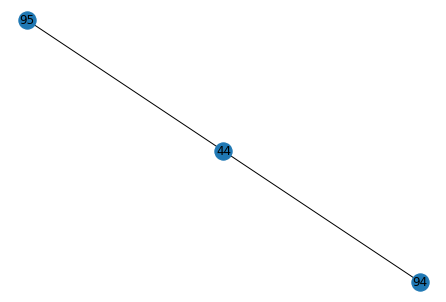

match_branches = [[44, 95]]
edges_to_delete (resolve crossover) = [[44, 94], [94, 95]]
edges_to_create (resolve crossover) = [[44, 95]]
edges_to_delete (cut_limb_network) = [array([44., 94.]), array([94., 95.])]
edges_to_create = [[44, 95]]
Number of connected components = 4
Comp 0 = {13, 17, 18, 19, 28, 32, 34, 35, 39, 40, 42, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77.0, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94}
Comp 1 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 36, 37, 38, 41, 43, 44, 46, 47, 91, 92, 95}
Comp 2 = {4}
Comp 3 = {14}
curr_limb_copy.deleted_edges = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23], [74, 77], [74, 79], [75, 77], [75, 79], array([44., 94.]), array([94., 95.])]
curr_limb_copy.created_edges = [[22, 23], [74, 75], [77, 79], [44, 95]]
After get best cut: cut_edges = [array([44., 94.]), array([94., 95.])], added_e

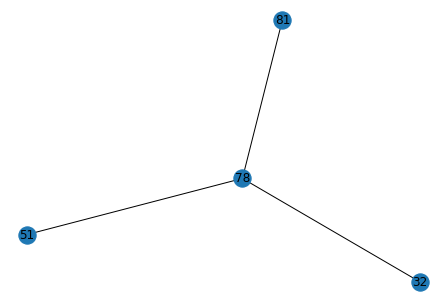

match_branches = [[78, 81]]
edges_to_delete (resolve crossover) = [[32, 51], [32, 78], [32, 81], [51, 78], [51, 81]]
edges_to_create (resolve crossover) = [[78, 81]]
curr_limb.deleted_edges 5 =[[4, 14], [4, 22], [4, 23], [14, 22], [14, 23], [74, 77], [74, 79], [75, 77], [75, 79], array([44., 94.]), array([94., 95.])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[32, 51], [32, 78], [32, 81], [51, 78], [51, 81]]
edges_to_create = [[78, 81]]
Number of connected components = 7
Comp 0 = {13, 18, 19, 28, 34, 35, 39, 40, 42, 45, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77.0, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94}
Comp 1 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 36, 37, 38, 41, 43, 44, 46, 47, 91, 92, 95}
Comp 2 = {32}
Comp 3 = {17, 50, 51}
Comp 4 = {4}
Comp 5 = {14}
Comp 6 = {80}
curr_limb_copy.deleted_edges = [[4, 14], [4, 22], [4, 23], [14, 22]

  Edge: [86 69]: curr_angle = 2.69
  Edge: [69 64]: curr_angle = 21.98
  Edge: [64 63]: curr_angle = 18.98
  Edge: [63 62]: curr_angle = 20.0
  Edge: [62 65]: curr_angle = 16.6
  Edge: [65 68]: curr_angle = 140.83
  Edge: [68 67]: curr_angle = 16.34
  Edge: [67 71]: curr_angle = 3.16
  Edge: [71 76]: curr_angle = 29.99
  Edge: [76 84]: curr_angle = 12.48
  Edge: [84 78]: curr_angle = 13.9
  Edge: [78 81]: curr_angle = 22.35
  Edge: [81 89]: curr_angle = 31.75

Total time for doubling_back = 1.224456548690796
There were 1 edges that passed doubling back threshold of 100
Winning edge [65 68] had a doubling back of 140.8261526973814
***inside resolve crossover!!!!****
coordinate_branches = [65, 68, 73]
65 = red
68 = aqua
73 = purple
Angle between 65 and 68 = 129.0 
Angle between 65 and 73 = 23.44 
Angle between 68 and 73 = 30.07 
Final Matches = [[65, 73], [68, 73]]
matched_branches_revised = [[65, 73]]
Original graph


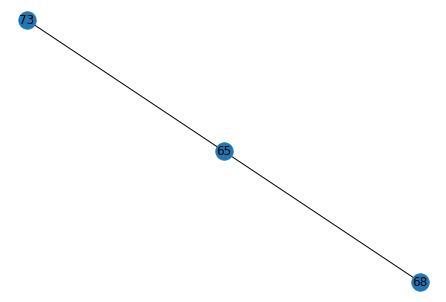

match_branches = [[65, 73]]
edges_to_delete (resolve crossover) = [[65, 68], [68, 73]]
edges_to_create (resolve crossover) = [[65, 73]]
edges_to_delete (cut_limb_network) = [array([65, 68]), array([68, 73])]
edges_to_create = [[65, 73]]
Number of connected components = 8
Comp 0 = {13, 18, 28, 34, 35, 39, 40, 42, 48, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 72, 73, 74, 75, 77.0, 79, 82, 83, 86, 90, 93, 94}
Comp 1 = {67, 68, 70, 71, 76, 45, 78, 49, 81, 19, 84, 85, 87, 56, 89, 88}
Comp 2 = {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 36, 37, 38, 41, 43, 44, 46, 47, 91, 92, 95}
Comp 3 = {32}
Comp 4 = {17, 50, 51}
Comp 5 = {4}
Comp 6 = {14}
Comp 7 = {80}
curr_limb_copy.deleted_edges = [[4, 14], [4, 22], [4, 23], [14, 22], [14, 23], [74, 77], [74, 79], [75, 77], [75, 79], array([44., 94.]), array([94., 95.]), [32, 51], [32, 78], [32, 81], [51, 78], [51, 81], array([65, 68]), array([68, 73])]
curr_limb_copy.created_edges = 

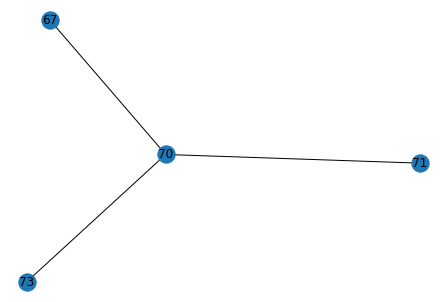

match_branches = []
edges_to_delete (resolve crossover) = [[67, 70], [67, 71], [67, 73], [70, 71], [70, 73], [71, 73]]
edges_to_create (resolve crossover) = []
curr_limb.deleted_edges 5 =[]
Skipping endnode 100 because skeletal distance was 1610.3339398034825 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[67, 70], [67, 71], [67, 73], [70, 71], [70, 73], [71, 73]]
edges_to_create = []
Number of connected components = 4
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,

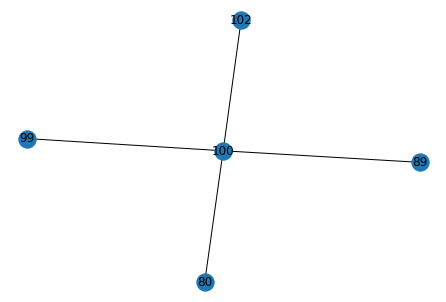

match_branches = [[99, 100], [80, 102]]
edges_to_delete (resolve crossover) = [[80, 89], [80, 99], [80, 100], [89, 99], [89, 100], [89, 102], [99, 102], [100, 102]]
edges_to_create (resolve crossover) = [[99, 100], [80, 102]]
curr_limb.deleted_edges 5 =[[67, 70], [67, 71], [67, 73], [70, 71], [70, 73], [71, 73]]
Skipping endnode 100 because skeletal distance was 1610.3339398034825 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[80, 89], [80, 99], [80, 100], [89, 99], [89, 100], [89, 102], [99, 102], [100, 102]]
edges_to_create = [[99, 100], [80, 102]]
Number of connected components = 8
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 74, 77, 78, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 106, 107, 

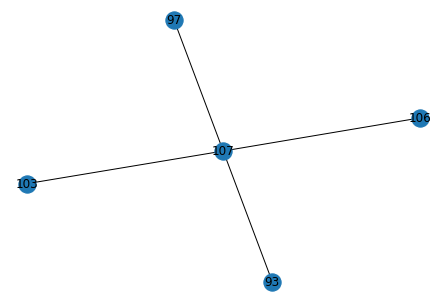

match_branches = [[97, 103], [93, 106]]
edges_to_delete (resolve crossover) = [[93, 97], [93, 103], [93, 107], [97, 106], [97, 107], [103, 106], [103, 107], [106, 107]]
edges_to_create (resolve crossover) = [[97, 103], [93, 106]]
curr_limb.deleted_edges 5 =[[67, 70], [67, 71], [67, 73], [70, 71], [70, 73], [71, 73], [80, 89], [80, 99], [80, 100], [89, 99], [89, 100], [89, 102], [99, 102], [100, 102]]
Skipping endnode 100 because skeletal distance was 1610.3339398034825 and threshold was 2500
skip_nodes = [100]
edges_to_delete (cut_limb_network) = [[93, 97], [93, 103], [93, 107], [97, 106], [97, 107], [103, 106], [103, 107], [106, 107]]
edges_to_create = [[97, 103], [93, 106]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 141, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 42, 43, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 64, 65, 66, 18, 96, 97, 101, 103}
Comp 1 = {131, 132, 133, 134, 135, 136, 137

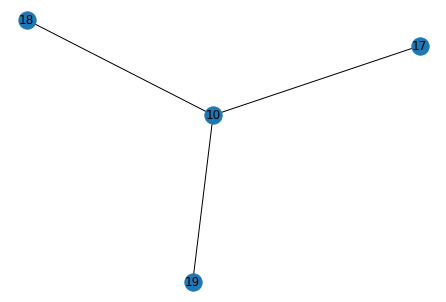

match_branches = [[10, 18]]
edges_to_delete (resolve crossover) = [[10, 17], [10, 19], [17, 18], [17, 19], [18, 19]]
edges_to_create (resolve crossover) = [[10, 18]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 9 because skeletal distance was 338.6007502173569 and threshold was 2500
skip_nodes = [9]
edges_to_delete (cut_limb_network) = [[10, 17], [10, 19], [17, 18], [17, 19], [18, 19]]
edges_to_create = [[10, 18]]
Number of connected components = 4
Comp 0 = {4, 5, 6, 7, 8, 9, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29}
Comp 1 = {10, 18}
Comp 2 = {0, 1, 2, 3, 13, 14, 17}
Comp 3 = {25}
curr_limb_copy.deleted_edges = [[10, 17], [10, 19], [17, 18], [17, 19], [18, 19]]
curr_limb_copy.created_edges = [[10, 18]]
After get best cut: cut_edges = [[10, 17], [10, 19], [17, 18], [17, 19], [18, 19]], added_edges = [[10, 18]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 4
Total numbe

  Edge: [208 206]: curr_angle = 44.59
  Edge: [206 209]: curr_angle = 38.17
  Edge: [209 298]: curr_angle = 110.47
  Edge: [298 326]: curr_angle = 37.06
  Edge: [326 355]: curr_angle = 25.06
  Edge: [355 360]: curr_angle = 33.66
  Edge: [360 362]: curr_angle = 37.49
  Edge: [362 320]: curr_angle = 93.52
  Edge: [320 258]: curr_angle = 16.06
  Edge: [258 229]: curr_angle = 20.79
  Edge: [229 213]: curr_angle = 43.68

Total time for doubling_back = 1.8984460830688477
There were 1 edges that passed doubling back threshold of 100
Winning edge [209 298] had a doubling back of 110.47378438619033
***inside resolve crossover!!!!****
coordinate_branches = [209, 298, 299]
209 = red
298 = aqua
299 = purple
Angle between 209 and 298 = 112.3 
Angle between 209 and 299 = 24.29 
Angle between 298 and 299 = 78.58 
Final Matches = [[209, 299]]
matched_branches_revised = [[209, 299]]
Original graph


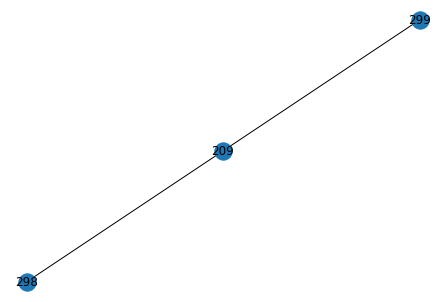

match_branches = [[209, 299]]
edges_to_delete (resolve crossover) = [[209, 298], [298, 299]]
edges_to_create (resolve crossover) = [[209, 299]]
edges_to_delete (cut_limb_network) = [array([209, 298]), array([298, 299])]
edges_to_create = [[209, 299]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165

  Edge: [213 229]: curr_angle = 43.68
  Edge: [229 258]: curr_angle = 20.79
  Edge: [258 320]: curr_angle = 16.06
  Edge: [320 361]: curr_angle = 55.66
  Edge: [361 369]: curr_angle = 11.66
  Edge: [369 372]: curr_angle = 11.55

Total time for doubling_back = 0.5326621532440186

Attempting the width jump check (attempting from both sides)
  Edge: [213 229]: jump = 61.18
  Edge: [229 258]: jump = -47.21
  Edge: [258 320]: jump = -27.86
  Edge: [320 361]: jump = 56.6
  Edge: [361 369]: jump = -3.99
  Edge: [369 372]: jump = 358.52
Adding error edge [369 372] because width jump was 358.5239971714433
Total time for width = 0.41908884048461914
Path starting at 213 had err_edges: [[369, 372]]
  Edge: [372 369]: jump = -358.52
  Edge: [369 361]: jump = 3.99
  Edge: [361 320]: jump = -56.6
  Edge: [320 258]: jump = 27.86
  Edge: [258 229]: jump = 47.21
  Edge: [229 213]: jump = -61.18
Total time for width = 0.4135277271270752
Path starting at 372 had err_edges: []
first_error_sizes = [358.5239

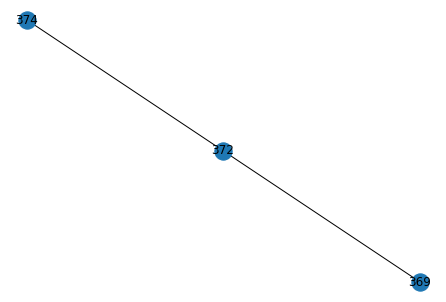

match_branches = []
edges_to_delete (resolve crossover) = [[369, 372], [369, 374], [372, 374]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([369, 372]), array([369, 374]), array([372, 374])]
edges_to_create = []
Number of connected components = 4
Comp 0 = {372}
Comp 1 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 16

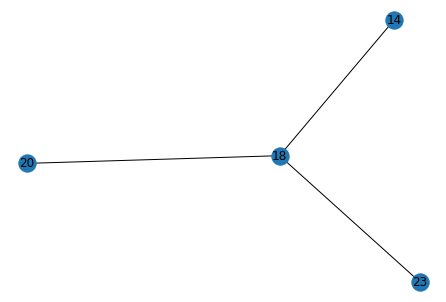

match_branches = [[14, 18], [20, 23]]
edges_to_delete (resolve crossover) = [[14, 20], [14, 23], [18, 20], [18, 23]]
edges_to_create (resolve crossover) = [[14, 18], [20, 23]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[14, 20], [14, 23], [18, 20], [18, 23]]
edges_to_create = [[14, 18], [20, 23]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}
Comp 1 = {49}
curr_limb_copy.deleted_edges = [[14, 20], [14, 23], [18, 20], [18, 23]]
curr_limb_copy.created_edges = [[14, 18], [20, 23]]
After get best cut: cut_edges = [[14, 20], [14, 23], [18, 20], [18, 23]], added_edges = [[14, 18], [20, 23]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the en

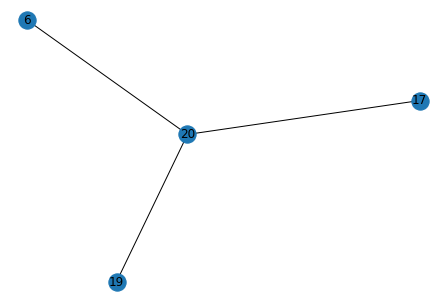

match_branches = [[6, 17]]
edges_to_delete (resolve crossover) = [[6, 19], [6, 20], [17, 19], [17, 20], [19, 20]]
edges_to_create (resolve crossover) = [[6, 17]]
curr_limb.deleted_edges 5 =[[14, 20], [14, 23], [18, 20], [18, 23]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[6, 19], [6, 20], [17, 19], [17, 20], [19, 20]]
edges_to_create = [[6, 17]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 22, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
Comp 1 = {0, 12, 47, 48, 20, 23, 24, 25, 27, 28, 29, 30}
Comp 2 = {19}
Comp 3 = {21}
Comp 4 = {49}
curr_limb_copy.deleted_edges = [[14, 20], [14, 23], [18, 20], [18, 23], [6, 19], [6, 20], [17, 19], [17, 20], [19, 20]]
curr_limb_copy.created_edges = [[14, 18], [20, 23], [6, 17]]
After get best cut: cut_edges = [[6, 19], [6, 20], [17, 19], [17, 20], [19, 20]], added_edges = [[6, 17]]
total_soma_paths_to_cut = [[14, 20], [14, 23], [18, 20], [18, 23]]
-----------

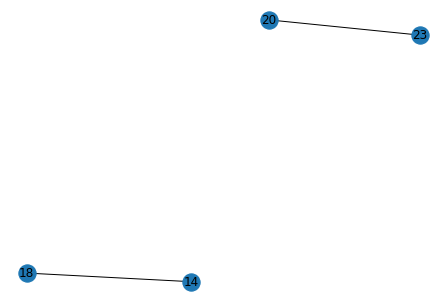

match_branches = [[14, 18], [20, 23]]
edges_to_delete (resolve crossover) = [[14, 20], [14, 23], [18, 20], [18, 23]]
edges_to_create (resolve crossover) = [[14, 18], [20, 23]]
curr_limb.deleted_edges 5 =[[14, 20], [14, 23], [18, 20], [18, 23], [6, 19], [6, 20], [17, 19], [17, 20], [19, 20]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[14, 20], [14, 23], [18, 20], [18, 23]]
edges_to_create = [[14, 18], [20, 23]]
Number of connected components = 5
Comp 0 = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 22, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
Comp 1 = {0, 12, 47, 48, 20, 23, 24, 25, 27, 28, 29, 30}
Comp 2 = {19}
Comp 3 = {21}
Comp 4 = {49}
curr_limb_copy.deleted_edges = [[14, 20], [14, 23], [18, 20], [18, 23], [6, 19], [6, 20], [17, 19], [17, 20], [19, 20], [14, 20], [14, 23], [18, 20], [18, 23]]
curr_limb_copy.created_edges = [[14, 18], [20, 23], [6, 17], [14, 18], [20, 23]]
After get best cut: cut_edges = [[14, 20], [14, 23], [18, 2

  Edge: [8 9]: curr_angle = 32.47
  Edge: [ 9 11]: curr_angle = 2.13
  Edge: [11 18]: curr_angle = 80.69
  Edge: [18 14]: curr_angle = 4.13
  Edge: [14 15]: curr_angle = 43.42
  Edge: [15 22]: curr_angle = 118.12
  Edge: [22 41]: curr_angle = 41.79
  Edge: [41 34]: curr_angle = 40.18
  Edge: [34 35]: curr_angle = 17.59
  Edge: [35 32]: curr_angle = 28.02

Total time for doubling_back = 0.5089709758758545
There were 1 edges that passed doubling back threshold of 100
Winning edge [15 22] had a doubling back of 118.11591447198468
***inside resolve crossover!!!!****
coordinate_branches = [15, 17, 22]
15 = red
17 = aqua
22 = purple
Angle between 15 and 17 = 107.36 
Angle between 15 and 22 = 88.66 
Angle between 17 and 22 = 17.04 
Final Matches = [[17, 22]]
matched_branches_revised = [[17, 22]]
Original graph


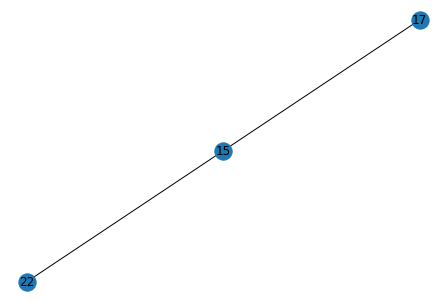

match_branches = [[17, 22]]
edges_to_delete (resolve crossover) = [[15, 17], [15, 22]]
edges_to_create (resolve crossover) = [[17, 22]]
edges_to_delete (cut_limb_network) = [array([15, 17]), array([15, 22])]
edges_to_create = [[17, 22]]
Number of connected components = 6
Comp 0 = {1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18}
Comp 1 = {0, 12, 47, 48, 20, 23, 24, 25, 27, 28, 29, 30}
Comp 2 = {3, 6, 17, 22, 26, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
Comp 3 = {19}
Comp 4 = {21}
Comp 5 = {49}
curr_limb_copy.deleted_edges = [[14, 20], [14, 23], [18, 20], [18, 23], [6, 19], [6, 20], [17, 19], [17, 20], [19, 20], [14, 20], [14, 23], [18, 20], [18, 23], array([15, 17]), array([15, 22])]
curr_limb_copy.created_edges = [[14, 18], [20, 23], [6, 17], [14, 18], [20, 23], [17, 22]]
After get best cut: cut_edges = [array([15, 17]), array([15, 22])], added_edges = [[17, 22]]
total_soma_paths_to_cut = [[14, 20], [14, 23], [18, 20], [18, 23]]
-----------counter = 1-----------

  Edge: [32 36]: curr_angle = 57.35
  Edge: [36 43]: curr_angle = 24.4
  Edge: [43 45]: curr_angle = 150.12
  Edge: [45 40]: curr_angle = 153.41
  Edge: [40 33]: curr_angle = 27.68

Total time for doubling_back = 0.1754589080810547
There were 2 edges that passed doubling back threshold of 100
Winning edge [45 40] had a doubling back of 153.4067050938305
***inside resolve crossover!!!!****
coordinate_branches = [40, 45, 46]
40 = red
45 = aqua
46 = purple
Angle between 40 and 45 = 43.52 
Angle between 40 and 46 = 28.07 
Angle between 45 and 46 = 160.56 
Final Matches = [[40, 46]]
matched_branches_revised = [[40, 46]]
Original graph


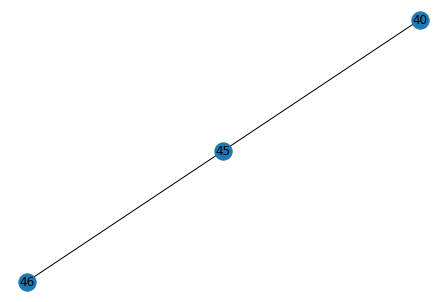

match_branches = [[40, 46]]
edges_to_delete (resolve crossover) = [[40, 45], [45, 46]]
edges_to_create (resolve crossover) = [[40, 46]]
edges_to_delete (cut_limb_network) = [array([40, 45]), array([45, 46])]
edges_to_create = [[40, 46]]
Number of connected components = 7
Comp 0 = {1, 2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18}
Comp 1 = {0, 12, 47, 48, 20, 23, 24, 25, 27, 28, 29, 30}
Comp 2 = {32, 34, 3, 35, 36, 6, 38, 41, 42, 43, 44, 45, 17, 22, 31}
Comp 3 = {19}
Comp 4 = {33, 37, 39, 40, 46, 26}
Comp 5 = {21}
Comp 6 = {49}
curr_limb_copy.deleted_edges = [[14, 20], [14, 23], [18, 20], [18, 23], [6, 19], [6, 20], [17, 19], [17, 20], [19, 20], [14, 20], [14, 23], [18, 20], [18, 23], array([15, 17]), array([15, 22]), array([40, 45]), array([45, 46])]
curr_limb_copy.created_edges = [[14, 18], [20, 23], [6, 17], [14, 18], [20, 23], [17, 22], [40, 46]]
After get best cut: cut_edges = [array([40, 45]), array([45, 46])], added_edges = [[40, 46]]
total_soma_paths_to_cut = []
-----------counte

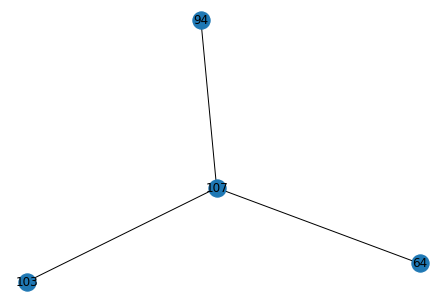

match_branches = [[103, 107]]
edges_to_delete (resolve crossover) = [[64, 94], [64, 103], [64, 107], [94, 103], [94, 107]]
edges_to_create (resolve crossover) = [[103, 107]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[64, 94], [64, 103], [64, 107], [94, 103], [94, 107]]
edges_to_create = [[103, 107]]
Number of connected components = 7
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 103, 105, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 

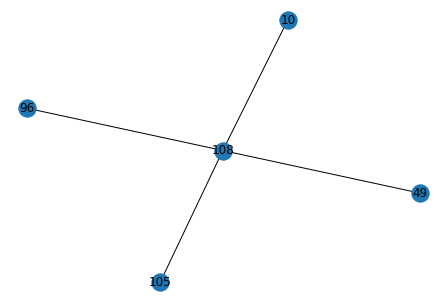

match_branches = [[105, 108]]
edges_to_delete (resolve crossover) = [[10, 49], [10, 96], [10, 105], [10, 108], [49, 96], [49, 105], [49, 108], [96, 105], [96, 108]]
edges_to_create (resolve crossover) = [[105, 108]]
curr_limb.deleted_edges 5 =[[64, 94], [64, 103], [64, 107], [94, 103], [94, 107]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[10, 49], [10, 96], [10, 105], [10, 108], [49, 96], [49, 105], [49, 108], [96, 105], [96, 108]]
edges_to_create = [[105, 108]]
Number of connected components = 10
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 105, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 

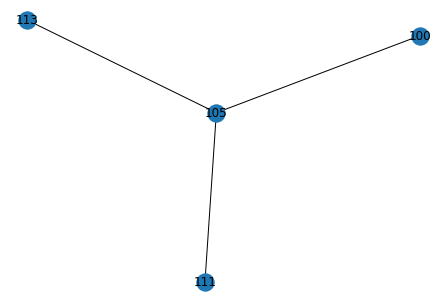

match_branches = [[100, 105]]
edges_to_delete (resolve crossover) = [[100, 111], [100, 113], [105, 111], [105, 113], [111, 113]]
edges_to_create (resolve crossover) = [[100, 105]]
curr_limb.deleted_edges 5 =[[64, 94], [64, 103], [64, 107], [94, 103], [94, 107], [10, 49], [10, 96], [10, 105], [10, 108], [49, 96], [49, 105], [49, 108], [96, 105], [96, 108]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[100, 111], [100, 113], [105, 111], [105, 113], [111, 113]]
edges_to_create = [[100, 105]]
Number of connected components = 12
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 105, 107, 108, 110, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 1

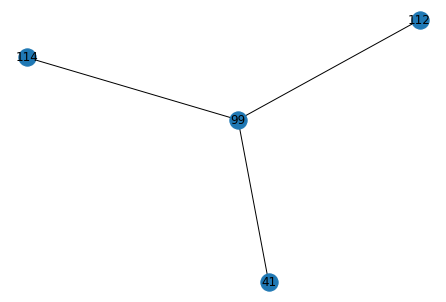

match_branches = [[99, 112]]
edges_to_delete (resolve crossover) = [[41, 99], [41, 112], [41, 114], [99, 114], [112, 114]]
edges_to_create (resolve crossover) = [[99, 112]]
curr_limb.deleted_edges 5 =[[64, 94], [64, 103], [64, 107], [94, 103], [94, 107], [10, 49], [10, 96], [10, 105], [10, 108], [49, 96], [49, 105], [49, 108], [96, 105], [96, 108], [100, 111], [100, 113], [105, 111], [105, 113], [111, 113]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[41, 99], [41, 112], [41, 114], [99, 114], [112, 114]]
edges_to_create = [[99, 112]]
Number of connected components = 14
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 105, 107, 108, 110, 112, 115, 116, 117, 118, 11

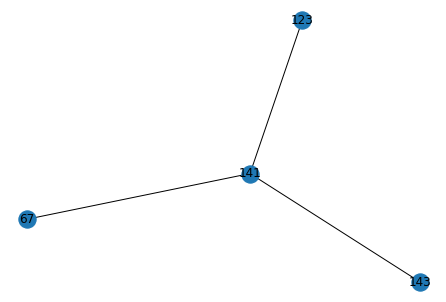

match_branches = [[141, 143]]
edges_to_delete (resolve crossover) = [[67, 123], [67, 141], [67, 143], [123, 141], [123, 143]]
edges_to_create (resolve crossover) = [[141, 143]]
curr_limb.deleted_edges 5 =[[64, 94], [64, 103], [64, 107], [94, 103], [94, 107], [10, 49], [10, 96], [10, 105], [10, 108], [49, 96], [49, 105], [49, 108], [96, 105], [96, 108], [100, 111], [100, 113], [105, 111], [105, 113], [111, 113], [41, 99], [41, 112], [41, 114], [99, 114], [112, 114]]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[67, 123], [67, 141], [67, 143], [123, 141], [123, 143]]
edges_to_create = [[141, 143]]
Number of connected components = 16
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 95, 97, 98, 99, 100,

  Edge: [108 105]: curr_angle = 22.39
  Edge: [105 100]: curr_angle = 32.69
  Edge: [100  99]: curr_angle = 30.54
  Edge: [ 99 112]: curr_angle = 13.55
  Edge: [112 118]: curr_angle = 20.85
  Edge: [118 117]: curr_angle = 43.48
  Edge: [117 116]: curr_angle = 24.67
  Edge: [116 107]: curr_angle = 25.83
  Edge: [107 103]: curr_angle = 22.25
  Edge: [103 101]: curr_angle = 33.57
  Edge: [101  98]: curr_angle = 18.79
  Edge: [98 83]: curr_angle = 14.78
  Edge: [83 75]: curr_angle = 19.52
  Edge: [75 61]: curr_angle = 19.83
  Edge: [61 62]: curr_angle = 39.2
  Edge: [62 70]: curr_angle = 20.93
  Edge: [ 70 141]: curr_angle = 28.41
  Edge: [141 143]: curr_angle = 19.7
  Edge: [143 145]: curr_angle = 15.19
  Edge: [145 147]: curr_angle = 25.76
  Edge: [147 149]: curr_angle = 37.43
  Edge: [149 151]: curr_angle = 12.93
  Edge: [151 154]: curr_angle = 26.66
  Edge: [154 157]: curr_angle = 26.23
  Edge: [157 155]: curr_angle = 17.42

Total time for doubling_back = 1.440338373184204

Attempting 

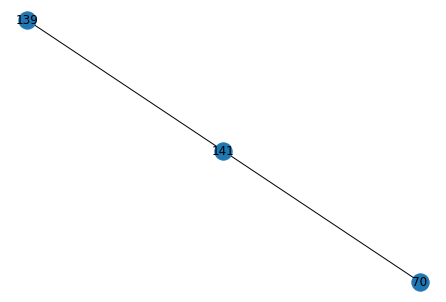

match_branches = []
edges_to_delete (resolve crossover) = [[70, 139], [70, 141], [139, 141]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([ 70, 139]), array([ 70, 141]), array([139, 141])]
edges_to_create = []
Number of connected components = 18
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 105, 107, 108, 110, 112, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 131, 132, 134, 136}
Comp 1 = {10}
Comp 2 = {32, 38, 48, 49, 54, 58}
Comp 3 = {96, 137, 138}
Comp 4 = {111}
Comp 5 = {113}
Comp 6 = {41, 164}
Comp 7 = {128, 129, 130, 114, 89}
Comp 8 = {64}
Comp 9 = {94}
Comp 10 = {139}
Comp 11 = {133, 135, 140, 141, 142, 143, 144, 1

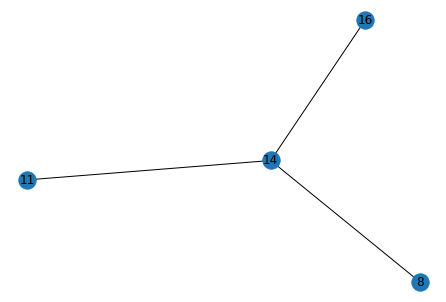

match_branches = [[8, 16], [11, 14]]
edges_to_delete (resolve crossover) = [[8, 11], [8, 14], [11, 16], [14, 16]]
edges_to_create (resolve crossover) = [[8, 16], [11, 14]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[8, 11], [8, 14], [11, 16], [14, 16]]
edges_to_create = [[8, 16], [11, 14]]
Number of connected components = 2
Comp 0 = {33, 1, 2, 36, 37, 38, 39, 40, 41, 42, 43, 8, 10, 6, 16, 17, 3, 23, 29, 30}
Comp 1 = {0, 4, 5, 7, 9, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 31, 32, 34, 35}
curr_limb_copy.deleted_edges = [[8, 11], [8, 14], [11, 16], [14, 16]]
curr_limb_copy.created_edges = [[8, 16], [11, 14]]
After get best cut: cut_edges = [[8, 11], [8, 14], [11, 16], [14, 16]], added_edges = [[8, 16], [11, 14]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2


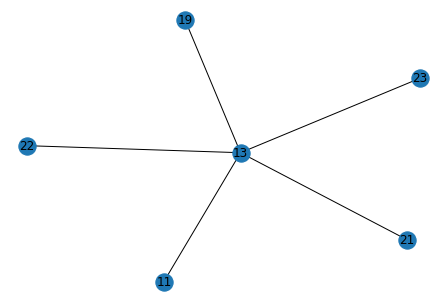

match_branches = [[11, 23], [19, 21], [13, 22]]
edges_to_delete (resolve crossover) = [[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [13, 23], [19, 22], [19, 23], [21, 22], [21, 23], [22, 23]]
edges_to_create (resolve crossover) = [[11, 23], [19, 21], [13, 22]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [13, 23], [19, 22], [19, 23], [21, 22], [21, 23], [22, 23]]
edges_to_create = [[11, 23], [19, 21], [13, 22]]
Number of connected components = 4
Comp 0 = {0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54}
Comp 1 = {11, 23}
Comp 2 = {3, 19, 12, 21}
Comp 3 = {20}
curr_limb_copy.deleted_edges = [[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [13, 23], [19, 22], [19, 23], [21, 22], [21, 23], [22, 23]]
curr_limb_copy.created_edges = [[1

  Edge: [15 16]: curr_angle = 24.54
  Edge: [16 14]: curr_angle = 24.61
  Edge: [14 13]: curr_angle = 63.3
  Edge: [13 22]: curr_angle = 14.98
  Edge: [22 26]: curr_angle = 39.34
  Edge: [26 27]: curr_angle = 38.89
  Edge: [27 31]: curr_angle = 22.5
  Edge: [31 35]: curr_angle = 7.91
  Edge: [35 37]: curr_angle = 29.9
  Edge: [37 36]: curr_angle = 22.9

Total time for doubling_back = 1.9609696865081787

Attempting the width jump check (attempting from both sides)
  Edge: [15 16]: jump = -27.51
  Edge: [16 14]: jump = 20.73
  Edge: [14 13]: jump = -55.74
  Edge: [13 22]: jump = -178.83
  Edge: [22 26]: jump = 93.91
  Edge: [26 27]: jump = 343.63
Adding error edge [26 27] because width jump was 343.62895363167047
  Edge: [27 31]: jump = 13.48
  Edge: [31 35]: jump = 61.59
  Edge: [35 37]: jump = 109.96
  Edge: [37 36]: jump = 128.93
Total time for width = 0.9214003086090088
Path starting at 15 had err_edges: [[26, 27]]
  Edge: [36 37]: jump = -128.93
  Edge: [37 35]: jump = -109.96
  Edg

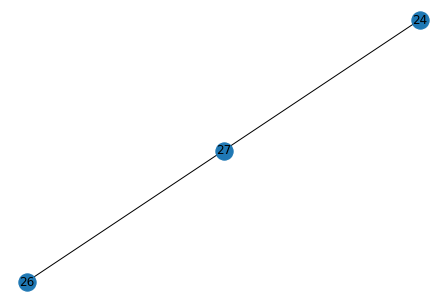

match_branches = []
edges_to_delete (resolve crossover) = [[24, 26], [24, 27], [26, 27]]
edges_to_create (resolve crossover) = []
edges_to_delete (cut_limb_network) = [array([24, 26]), array([24, 27]), array([26, 27])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {0, 1, 4, 6, 7, 8, 13, 14, 15, 16, 17, 22, 26, 28, 29, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54}
Comp 1 = {11, 23}
Comp 2 = {3, 19, 12, 21}
Comp 3 = {2, 5, 10, 18, 24}
Comp 4 = {32, 33, 34, 35, 36, 37, 38, 39, 40, 9, 41, 43, 42, 25, 27, 30, 31}
Comp 5 = {20}
curr_limb_copy.deleted_edges = [[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [13, 23], [19, 22], [19, 23], [21, 22], [21, 23], [22, 23], array([24, 26]), array([24, 27]), array([26, 27])]
curr_limb_copy.created_edges = [[11, 23], [19, 21], [13, 22]]
After get best cut: cut_edges = [array([24, 26]), array([24, 27]), array([26, 27])], added_edges = []
total_soma_paths_to_cut = [[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [

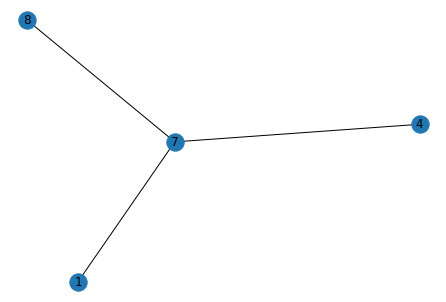

match_branches = [[4, 8], [1, 7]]
edges_to_delete (resolve crossover) = [[1, 4], [1, 8], [4, 7], [7, 8]]
edges_to_create (resolve crossover) = [[4, 8], [1, 7]]
curr_limb.deleted_edges 5 =[[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [13, 23], [19, 22], [19, 23], [21, 22], [21, 23], [22, 23], array([24, 26]), array([24, 27]), array([26, 27])]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[1, 4], [1, 8], [4, 7], [7, 8]]
edges_to_create = [[4, 8], [1, 7]]
Number of connected components = 8
Comp 0 = {4, 8, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 29}
Comp 1 = {0, 1, 7, 13, 14, 15, 16, 17, 22, 26, 28}
Comp 2 = {11, 23}
Comp 3 = {3, 19, 12, 21}
Comp 4 = {2, 5, 10, 18, 24}
Comp 5 = {32, 33, 34, 35, 36, 37, 38, 39, 40, 9, 41, 43, 42, 25, 27, 30, 31}
Comp 6 = {6}
Comp 7 = {20}
curr_limb_copy.deleted_edges = [[11, 13], [11, 19], [11, 21], [11, 22], [13, 19], [13, 21], [13, 23], [19, 22], [19, 23], [21, 22], [21, 23], [22, 23], array([24, 26]), array([24, 27]), array([26

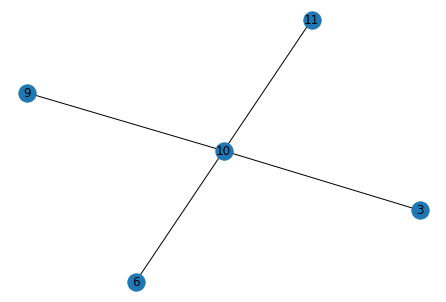

match_branches = [[9, 11], [3, 10]]
edges_to_delete (resolve crossover) = [[3, 6], [3, 9], [3, 11], [6, 9], [6, 10], [6, 11], [9, 10], [10, 11]]
edges_to_create (resolve crossover) = [[9, 11], [3, 10]]
curr_limb.deleted_edges 5 =[]
Skipping endnode 16 because skeletal distance was 325.91496933878693 and threshold was 2500
skip_nodes = [16]
edges_to_delete (cut_limb_network) = [[3, 6], [3, 9], [3, 11], [6, 9], [6, 10], [6, 11], [9, 10], [10, 11]]
edges_to_create = [[9, 11], [3, 10]]
Number of connected components = 3
Comp 0 = {10, 3, 14, 15}
Comp 1 = {6}
Comp 2 = {0, 1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 16}
curr_limb_copy.deleted_edges = [[3, 6], [3, 9], [3, 11], [6, 9], [6, 10], [6, 11], [9, 10], [10, 11]]
curr_limb_copy.created_edges = [[9, 11], [3, 10]]
After get best cut: cut_edges = [[3, 6], [3, 9], [3, 11], [6, 9], [6, 10], [6, 11], [9, 10], [10, 11]], added_edges = [[9, 11], [3, 10]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of grap

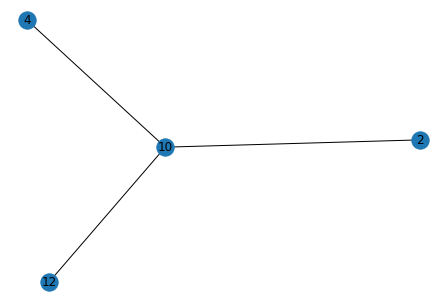

match_branches = [[10, 12]]
edges_to_delete (resolve crossover) = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
edges_to_create (resolve crossover) = [[10, 12]]
curr_limb.deleted_edges 5 =[]
skip_nodes = []
edges_to_delete (cut_limb_network) = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
edges_to_create = [[10, 12]]
Number of connected components = 4
Comp 0 = {0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Comp 1 = {2}
Comp 2 = {4}
Comp 3 = {11}
curr_limb_copy.deleted_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]]
curr_limb_copy.created_edges = [[10, 12]]
After get best cut: cut_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12]], added_edges = [[10, 12]]
total_soma_paths_to_cut = []
----

  Edge: [16 10]: curr_angle = 30.82
  Edge: [10 12]: curr_angle = 15.08
  Edge: [12 13]: curr_angle = 15.86
  Edge: [13 15]: curr_angle = 20.24
  Edge: [15 21]: curr_angle = 39.34
  Edge: [21 23]: curr_angle = 28.09
  Edge: [23 25]: curr_angle = 30.01
  Edge: [25 37]: curr_angle = 38.72
  Edge: [37 52]: curr_angle = 58.44
  Edge: [52 53]: curr_angle = 13.32
  Edge: [53 54]: curr_angle = 10.27
  Edge: [54 58]: curr_angle = 13.8
  Edge: [58 61]: curr_angle = 3.12
  Edge: [61 62]: curr_angle = 19.24
  Edge: [62 69]: curr_angle = 35.87
  Edge: [69 67]: curr_angle = 34.13
  Edge: [67 66]: curr_angle = 46.15

Total time for doubling_back = 3.0336031913757324

Attempting the width jump check (attempting from both sides)
  Edge: [16 10]: jump = -54.21
  Edge: [10 12]: jump = 56.31
  Edge: [12 13]: jump = 95.25
  Edge: [13 15]: jump = 35.25
  Edge: [15 21]: jump = -193.12
  Edge: [21 23]: jump = -218.17
  Edge: [23 25]: jump = -54.07
  Edge: [25 37]: jump = 85.5
  Edge: [37 52]: jump = -34.75
 

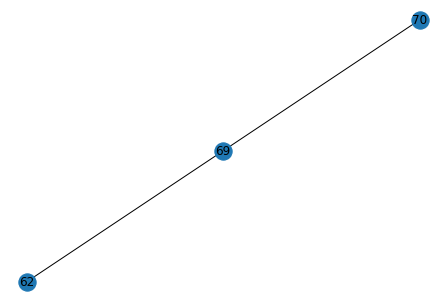

match_branches = [[62, 69]]
edges_to_delete (resolve crossover) = [[62, 70], [69, 70]]
edges_to_create (resolve crossover) = [[62, 69]]
Rejecting creating edge [62, 69] becuase did not involve only 1 node in the deleted edge
edges_to_delete (cut_limb_network) = [array([62, 69]), array([62, 70]), array([69, 70])]
edges_to_create = []
Number of connected components = 6
Comp 0 = {66, 67, 68, 69, 39, 40, 73, 74, 75, 76, 77, 78, 50, 51, 56, 57, 59}
Comp 1 = {0, 1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54, 55, 58, 60, 61, 62, 63, 64, 65, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90}
Comp 2 = {72, 70, 71}
Comp 3 = {2}
Comp 4 = {4}
Comp 5 = {11}
curr_limb_copy.deleted_edges = [[2, 4], [2, 10], [2, 12], [4, 10], [4, 12], array([62, 69]), array([62, 70]), array([69, 70])]
curr_limb_copy.created_edges = [[10, 12]]
After get best cut: cut_edges = [array([62, 69]

  Edge: [23 20]: curr_angle = 15.32
  Edge: [20 21]: curr_angle = 30.84
  Edge: [21 24]: curr_angle = 56.67
  Edge: [24 28]: curr_angle = 30.39
  Edge: [28 34]: curr_angle = 26.54
  Edge: [34 35]: curr_angle = 20.64
  Edge: [35 36]: curr_angle = 9.19

Total time for doubling_back = 1.2417614459991455

Attempting the width jump check (attempting from both sides)
  Edge: [23 20]: jump = 20.04
  Edge: [20 21]: jump = -24.78
  Edge: [21 24]: jump = -459.17
  Edge: [24 28]: jump = 66.4
  Edge: [28 34]: jump = 145.8
  Edge: [34 35]: jump = 48.35
  Edge: [35 36]: jump = 105.82
Total time for width = 1.114365816116333
Path starting at 26 had err_edges: []
  Edge: [36 35]: jump = -105.82
  Edge: [35 34]: jump = -48.35
  Edge: [34 28]: jump = -145.8
  Edge: [28 24]: jump = -66.4
  Edge: [24 21]: jump = 441.42
Adding error edge [24 21] because width jump was 441.42188371926
  Edge: [21 20]: jump = 155.47
  Edge: [20 23]: jump = -20.04
Total time for width = 1.3790295124053955
Path starting at 36 

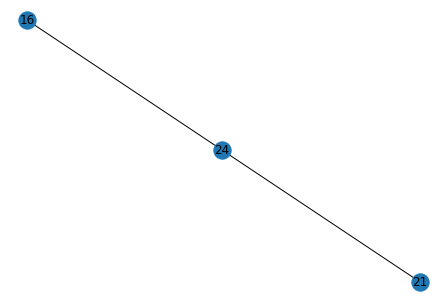

match_branches = [[16, 21]]
edges_to_delete (resolve crossover) = [[16, 24], [21, 24]]
edges_to_create (resolve crossover) = [[16, 21]]
edges_to_delete (cut_limb_network) = [array([16, 24]), array([21, 24])]
edges_to_create = [[16, 21]]
Number of connected components = 2
Comp 0 = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27}
Comp 1 = {32, 33, 34, 35, 36, 13, 24, 28, 29, 30, 31}
curr_limb_copy.deleted_edges = [array([16, 24]), array([21, 24])]
curr_limb_copy.created_edges = [[16, 21]]
After get best cut: cut_edges = [array([16, 24]), array([21, 24])], added_edges = [[16, 21]]
total_soma_paths_to_cut = []
-----------counter = 0------------
 Cut iteration 1
Total number of graphs at the end of the split BEFORE DIRECTIONAL = 2
Total number of graphs at the end of the split AFTER DIRECTIONAL = 2
No valid path so moving onto the next connection
Total number of graphs at the end of the split = 2: [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 

  Edge: [0 2]: curr_angle = 66.77

Total time for doubling_back = 0.3019862174987793

Attempting the width jump check (attempting from both sides)
  Edge: [0 2]: jump = -41.68
Total time for width = 0.28998804092407227
Path starting at 0 had err_edges: []
  Edge: [2 0]: jump = 41.68
Total time for width = 0.32085704803466797
Path starting at 2 had err_edges: []
Did not find an error edge in either of the paths
Number of connected components = 1
Comp 0 = {0, 1, 2}
curr_limb_copy.deleted_edges = []
curr_limb_copy.created_edges = []
After get best cut: cut_edges = None, added_edges = []
***** there was no suggested cut for this limb even though it is still connnected***
Total number of graphs at the end of the split = 1: [array([0, 1, 2])]


 ------ Total time for Splitting 864691135526114907 = 311.30882024765015 ------
Populate Done
Total time for NeuronSplitSuggestions populate = 4767.270218372345


In [11]:
start_time = time.time()
if not test_mode:
    time.sleep(random.randint(0, 800))
print('Populate Started')
if not test_mode:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
else:
    NeuronSplitSuggestions.populate(reserve_jobs=True, suppress_errors=True)
print('Populate Done')

print(f"Total time for NeuronSplitSuggestions populate = {time.time() - start_time}")